In [1]:
!pip install pandas

In [18]:
!pip install matplotlib


  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [82]:
!pip install openpyxl

In [24]:
!pip install gensim

  Using cached gensim-4.1.2-cp39-cp39-win_amd64.whl (24.0 MB)
  Using cached Cython-0.29.23-cp39-cp39-win_amd64.whl (1.7 MB)


In [30]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
os.chdir('C:\\Users\\adhit\\Desktop\\pers\\Coding Challenge SAP')

In [5]:
true_df=pd.read_csv("True.csv" ,skipinitialspace = True)
fake_df=pd.read_csv("Fake.csv" ,skipinitialspace = True)
true_df['class'] = 1
fake_df['class'] = 0

In [6]:
news_df = pd.concat([true_df,fake_df])

In [7]:
news_df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

Text(0, 0.5, 'Number of Occurances')

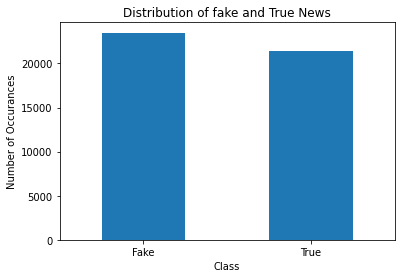

In [8]:
count_classes = pd.value_counts(news_df['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of fake and True News")
plt.xticks(range(2), ['Fake','True'])
plt.xlabel("Class")
plt.ylabel("Number of Occurances")

# Data Cleaning

In [9]:
#Replace empty string with NA Values.

news_df['text'].replace('', np.nan, inplace=True)

In [10]:
# check for NA values.
news_df['text'].isna().values.any()

True

In [11]:
# drop the NA values.
news_df.dropna(inplace=True)

In [12]:
#Removing duplicates

news_df['dup'] = news_df.duplicated(subset=['text'], keep='first')
news_df.head()

,title,text,subject,date,class,dup
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,False
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,False
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,False
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,False
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,False


In [13]:
# removing the duplicate columns.

news_df = news_df[news_df['dup'] == False]

In [14]:
#deleting the column 'dup'

del news_df['dup']

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [16]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38644 entries, 0 to 22702
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38644 non-null  object
 1   text     38644 non-null  object
 2   subject  38644 non-null  object
 3   date     38644 non-null  object
 4   class    38644 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [17]:
news_df.shape

(38644, 5)

#  Text Preprocessing

In [138]:
!pip install spacy

  Using cached preshed-3.0.6-cp39-cp39-win_amd64.whl (112 kB)
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached blis-0.7.5-cp39-cp39-win_amd64.whl (6.6 MB)
  Using cached pydantic-1.8.2-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached murmurhash-1.0.6-cp39-cp39-win_amd64.whl (21 kB)
  Using cached wasabi-0.9.0-py3-none-any.whl (25 kB)
  Using cached thinc-8.0.13-cp39-cp39-win_amd64.whl (1.0 MB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached cymem-2.0.6-cp39-cp39-win_amd64.whl (36 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
  Using cached srsly-2.4.2-cp39-cp39-win_amd64.whl (451 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)


In [139]:
!pip install nltk

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [18]:
import re

def replace_words(text):
    
    dict_country={'U.S.\s':'America '}
    
    for i, j in dict_country.items():
        text = re.sub(i, j,text,flags=re.IGNORECASE)
    return text

In [19]:
news_df['standardized_text']=news_df['text'].apply(replace_words)

In [20]:
import re
import spacy
from spacy.lang.en import English
from nltk.stem.snowball import SnowballStemmer
nlp = English()
nlp2= spacy.load('en_core_web_lg')
tokenizer = nlp.tokenizer
s_stemmer=SnowballStemmer(language='english')

def preprocess(input_text):
      
    # remove the web links in the text
    http_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text_http_removed = http_pattern.sub('', input_text)
    
    # regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", text_http_removed)
    
       
    # convert to lower case
    text_to_lower_case= letters_only_text.lower()
    
    
    # word tokenization
    token_list = []
    tokens = tokenizer(text_to_lower_case)
    for token in tokens:
        token_list.append(token.text)
    
    
    #stop words removal
    stop_words_removed_text=[]
    for tok in token_list:
        if nlp.vocab[tok].is_stop == False and len(tok.strip())!=0 and len(tok)!=1:
            stop_words_removed_text.append(tok)
#     print(stop_words_removed_text)


#      stemming
#     stemmed_text=[]
#     for word in stop_words_removed_text:
#         stemmed_text.append(s_stemmer.stem(word))
#      print(stemmed_text)
    
    
    #Lemmatization
    lemmatized_text=[]
    string=''
    for w in stop_words_removed_text:
        if string=='':
            string = w
        else:
            string= string + ' ' + w 
#     print(string)
    nlp_string = nlp2(string)
    for word in nlp_string:
        lemmatized_text.append(word.lemma_)
#     print(lemmatized_text)
    

    # converting list back to string
    return " ".join(lemmatized_text)

In [160]:
# the preprocessed objective is appended to the project_df dataframe.
news_df['cleaned_text'] = news_df['standardized_text'].apply(preprocess)

In [159]:
news_df.cleaned_text[0]

'washington reuters head conservative republican faction america congress vote month huge expansion national debt pay tax camerica call fiscal conservative sunday urge budget restraint keep sharp pivot way republicans america representative mark meadow speak cbs face nation draw hard line federal spending lawmaker brace battle january return holiday wednesday lawmaker begin try pass federal budget fight likely link issamerica immigration policy november congressional election campaign approach republican seek control congress president donald trump republicans want big budget increase military spending democrats want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration willing go increase non defense discretionary spending percent meadow chairman small influential house freedom caucus say program democrats say need government pay raise percent fiscal conservative

In [21]:
news_df= pd.read_json("news_df_prepro.json")

In [34]:
news_df_sample = news_df.head(5000)

# TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector =TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_vector.fit_transform(news_df_sample.cleaned_text).toarray()

In [37]:
X.shape

(5000, 5000)

In [38]:
y=news_df_sample['class']

In [39]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [41]:
tfidf_vector.get_feature_names()[:100]

['abandon',
 'abbas',
 'abbott',
 'abc',
 'abe',
 'abide',
 'ability',
 'able',
 'aboard',
 'abortion',
 'abroad',
 'absence',
 'absolutely',
 'abuse',
 'accelerate',
 'accept',
 'access',
 'accompany',
 'accomplish',
 'accord',
 'according',
 'account',
 'accountability',
 'accountable',
 'accounts',
 'accounts america',
 'accounts america president',
 'accuracy',
 'accuracy realdonaldtrump',
 'accusation',
 'accuse',
 'accuse trump',
 'achieve',
 'achievement',
 'acknowledge',
 'aclu',
 'acquisition',
 'act',
 'acting',
 'action',
 'action childhood',
 'action childhood arrival',
 'active',
 'activist',
 'activity',
 'actual',
 'actually',
 'ad',
 'adam',
 'adam schiff',
 'add',
 'add trillion',
 'addition',
 'additional',
 'address',
 'adjustment',
 'adjustment tax',
 'administration',
 'administration official',
 'administration official say',
 'administration plan',
 'administration president',
 'administration propose',
 'administration say',
 'administrator',
 'administrator sco

In [43]:
count_df = pd.DataFrame(X_train, columns=tfidf_vector.get_feature_names())

In [45]:
count_df.head()b

abandon  abbas  abbott  abc  abe  abide  ability  able  aboard  abortion  \
0  0.000000    0.0     0.0  0.0  0.0    0.0      0.0   0.0     0.0       0.0   
1  0.000000    0.0     0.0  0.0  0.0    0.0      0.0   0.0     0.0       0.0   
2  0.038049    0.0     0.0  0.0  0.0    0.0      0.0   0.0     0.0       0.0   
3  0.000000    0.0     0.0  0.0  0.0    0.0      0.0   0.0     0.0       0.0   
4  0.000000    0.0     0.0  0.0  0.0    0.0      0.0   0.0     0.0       0.0   

   abroad  absence  absolutely  abuse  accelerate  accept  access  accompany  \
0     0.0      0.0         0.0    0.0    0.000000     0.0     0.0        0.0   
1     0.0      0.0         0.0    0.0    0.065536     0.0     0.0        0.0   
2     0.0      0.0         0.0    0.0    0.000000     0.0     0.0        0.0   
3     0.0      0.0         0.0    0.0    0.000000     0.0     0.0        0.0   
4     0.0      0.0         0.0    0.0    0.000000     0.0     0.0        0.0   

   accomplish    accord  according   account  accountability  accountable  \
0         0.0  0.000000        0.0  0.000000             0.0          0.0   
1         0.0  0.033707        0.0  0.000000             0.0          0.0   
2         0.0  0.000000        0.0  0.029744             0.0          0.0   
3         0.0  0.000000        0.0  0.000000             0.0          0.0   
4         0.0  0.000000        0.0  0.000000             0.0          0.0   

   accounts  accounts america  accounts america president  accuracy  \
0  0.000000          0.000000                    0.000000  0.000000   
1  0.000000          0.000000                    0.000000  0.000000   
2  0.000000          0.000000                    0.000000  0.000000   
3  0.000000          0.000000                    0.000000  0.000000   
4  0.085349          0.085937                    0.085937  0.081265   

   accuracy realdonaldtrump  accusation  accuse  accuse trump  achieve  \
0                  0.000000    0.000000     0.0           0.0      0.0   
1                  0.000000    0.000000     0.0           0.0      0.0   
2                  0.000000    0.104293     0.0           0.0      0.0   
3                  0.000000    0.000000     0.0           0.0      0.0   
4                  0.085937    0.000000     0.0           0.0      0.0   

   achievement  acknowledge  aclu  acquisition  act  acting  action  \
0          0.0     0.000000   0.0          0.0  0.0     0.0     0.0   
1          0.0     0.000000   0.0          0.0  0.0     0.0     0.0   
2          0.0     0.033196   0.0          0.0  0.0     0.0     0.0   
3          0.0     0.000000   0.0          0.0  0.0     0.0     0.0   
4          0.0     0.000000   0.0          0.0  0.0     0.0     0.0   

   action childhood  action childhood arrival  active  activist  activity  \
0               0.0                       0.0     0.0       0.0       0.0   
1               0.0                       0.0     0.0       0.0       0.0   
2               0.0                       0.0     0.0       0.0       0.0   
3               0.0                       0.0     0.0       0.0       0.0   
4               0.0                       0.0     0.0       0.0       0.0   

   actual  actually   ad  adam  adam schiff  add  add trillion  addition  \
0     0.0       0.0  0.0   0.0          0.0  0.0           0.0       0.0   
1     0.0       0.0  0.0   0.0          0.0  0.0           0.0       0.0   
2     0.0       0.0  0.0   0.0          0.0  0.0           0.0       0.0   
3     0.0       0.0  0.0   0.0          0.0  0.0           0.0       0.0   
4     0.0       0.0  0.0   0.0          0.0  0.0           0.0       0.0   

   additional   address  adjustment  adjustment tax  administration  \
0         0.0  0.000000         0.0             0.0             0.0   
1         0.0  0.037244         0.0             0.0             0.0   
2         0.0  0.025492         0.0             0.0             0.0   
3         0.0  0.000000         0.0             0.0             0.0   
4    

# Multinominal Naive Bayes

In [47]:
from sklearn import metrics
import itertools

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [53]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy:   1.000


In [60]:
predicted_values= y_test

In [61]:
predicted_values['pred']

In [62]:
predicted_values

398                                                     1
3833                                                    1
4836                                                    1
4572                                                    1
636                                                     1
2545                                                    1
1161                                                    1
2230                                                    1
148                                                     1
2530                                                    1
4070                                                    1
1261                                                    1
4682                                                    1
333                                                     1
906                                                     1
3170                                                    1
483                                                     1
2825          